In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
from sklearn.datasets import load_boston
boston = load_boston()
type(boston)

sklearn.utils.Bunch

In [32]:
bos = pd.DataFrame(boston.data)

In [38]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [42]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


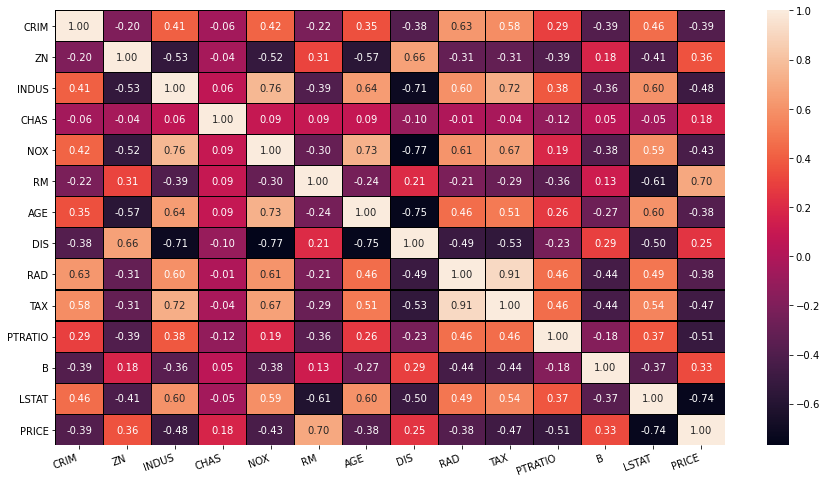

In [43]:
plt.figure(figsize=(15, 8))
ax = sns.heatmap(bos.corr(), fmt='.2f', annot=True, linewidths=0.1, linecolor='black');
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right');

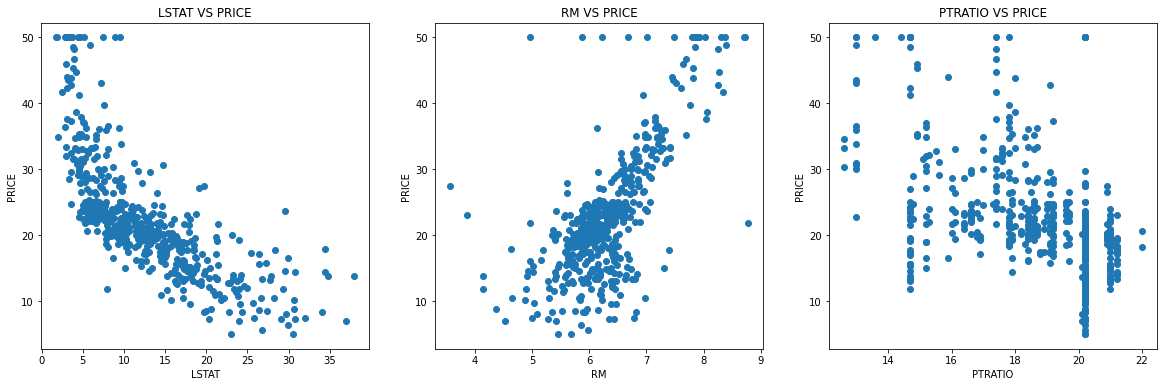

In [97]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ax[0].scatter(bos.LSTAT, bos.PRICE)
ax[0].set(xlabel='LSTAT', ylabel='PRICE', title='LSTAT VS PRICE')

ax[1].scatter(bos.RM, bos.PRICE)
ax[1].set(xlabel='RM', ylabel='PRICE', title='RM VS PRICE')

ax[2].scatter(bos.PTRATIO, bos.PRICE)
ax[2].set(xlabel='PTRATIO', ylabel='PRICE', title='PTRATIO VS PRICE')

plt.show()

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [75]:
cols = ['LSTAT', 'RM', 'PTRATIO', 'PRICE']
sub_cols = ['LSTAT', 'LSTAT']
train_df = bos[cols]

In [84]:
x_train, x_test, y_train, y_test = train_test_split(train_df[['LSTAT','PTRATIO','RM']], bos.PRICE, 
                                                    test_size=0.2, shuffle=True, random_state=4)

In [85]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [86]:
model.coef_

array([-0.53005617, -0.94421682,  4.59123177])

In [87]:
model.intercept_

17.722777408991302

In [90]:
y_predicted = model.predict(x_test)

In [91]:
y_predicted

array([13.35932676, 27.14938063, 18.62199481, 12.26061416, 36.54783239,
       25.4937713 , 31.55356528, 18.32910901, 19.62420676, 23.96800044,
       30.22112965, 26.08048371, 16.48147356, 29.62267981, 21.66777273,
       19.62205411, 23.92554812,  9.63170263, 11.67386958, 14.84930355,
       15.06980714, 21.68454546, 17.36170031, 21.20849119, 22.00167763,
       19.04108036, 12.45689024, 13.86492421, 21.77168609, 14.89222641,
       15.67628728, 26.79839621, 33.12478207, 19.02185952, 15.81004373,
       18.58403331, 30.39572758, 34.50379197, 25.19542037, 24.51372512,
       37.13358927, 33.28675455, 20.1225409 , 31.54718855, 28.06021141,
       23.66256972, 38.7077386 , 18.54136797, 20.23692297, 23.38976059,
       29.32916862, 27.23562015, 17.28640515, 29.9521019 , 14.96182988,
       23.09994599, 23.8807329 , 30.99329657, 16.74762814, 30.26100742,
       16.468788  , 19.82789044, 31.05374112, 19.13710918, 38.06948261,
       28.95887784, 27.35569007, 12.7914512 , 18.78014731, 22.02

In [92]:
y_test

8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
       ... 
368    50.0
144    11.8
336    19.5
437     8.7
216    23.3
Name: PRICE, Length: 102, dtype: float64

In [93]:
mean_squared_error(y_test, y_predicted)

30.340105190234606

In [94]:
mean_absolute_error(y_test, y_predicted)

3.584432102922694

In [95]:
r2_score(y_test, y_predicted) * 100

67.33732528519258